# Wordgame Word2Vec features
Welcome to the second notebook in my wordgame project. In this notebook our goal is to extract a the similarity of the word pairs based on Word2Vec. Word2Vec is a model.. 

a) open tail
b) compute sim 
1) Compare sim with sim of random word pairs (shift) 
2) Plot all sim dists 
3) Plot specific. word 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/processed/wordgame_20170628_basicfeatures.csv', dtype={'nt': np.bool, 'word1':str, 'word2':str})

df.head()

,author,word1,word2,source,sourceID,nt,len1,len2,d_len,edit,n_edit
0,1203,jailed,imprisoned,ecig,4,True,6,10,4,7,0.051471
1,5839,me,liverbird,wrongplanet,9,False,2,9,7,8,0.094118
2,2962,reach,up,sas,7,True,5,2,3,5,0.172414
3,1066,owie,band-aid,ecig,4,True,4,8,4,7,0.087500
4,5006,water,river,wrongplanet,9,False,5,5,0,3,0.060000


In [2]:
from gensim.models.keyedvectors import KeyedVectors

w2v_model = KeyedVectors.load_word2vec_format('../data/external/GoogleNews-vectors-negative300.bin', binary=True)
print('Loaded word embeddings')

Loading word embeddings...


In [154]:
def similarity(r):

	if (r.word1 in w2v_model.vocab) & (r.word2 in w2v_model.vocab):
		wv1 = w2v_model.word_vec(r.word1)
		wv2 = w2v_model.word_vec(r.word2)
		
		return w2v_model.similarity(r.word1, r.word2)
	else:
		return 100


df['sim'] = df.apply(similarity, axis=1) 


In [156]:
# remove a words (pairs) that are not in vocabulary
df = df[df['sim'] <= 1.0]
print("Number of remaining word pairs: " +str(len(df)))
print("Mean similariy score: " +str(df['sim'].mean()))


Number of remaining word pairs: 272570
Mean similariy score: 0.268536773247


,author,word1,word2,source,sourceID,nt,len1,len2,d_len,edit,n_edit,sim,simr
0,1203,jailed,imprisoned,ecig,4,True,6,10,4,7,0.051471,0.757315,100.000000
2,2962,reach,up,sas,7,True,5,2,3,5,0.172414,0.190445,100.000000
4,5006,water,river,wrongplanet,9,False,5,5,0,3,0.060000,0.576898,100.000000
5,229,tiger,lion,aspiecentral,0,False,5,4,1,4,0.097561,0.512104,0.170251
6,4705,spray,gun,the_fishy,8,True,5,3,2,5,0.147059,0.274585,0.008356


81% of pairs in vocabulary. sim = 0.27

Now random..

In [157]:
#
df['word2'] = df['word2'].shift(1)

df['simr'] = df.apply(similarity, axis=1)
#and.. shift back!
df['word2'] = df['word2'].shift(-1)

# remove a words (pairs) that are not in vocabulary
df = df[df['simr'] <= 1.0]
print("Number of remaining word pairs: " +str(len(df)))
print("Mean similariy score: " +str(df['simr'].mean()))

Number of remaining word pairs: 241520
Mean similariy score: 0.0819491034274


,author,word1,word2,source,sourceID,nt,len1,len2,d_len,edit,n_edit,sim,simr
5,229,tiger,lion,aspiecentral,0,False,5,4,1,4,0.097561,0.512104,0.170251
6,4705,spray,gun,the_fishy,8,True,5,3,2,5,0.147059,0.274585,0.008356
7,1056,absorb,osmosis,ecig,4,True,6,7,1,6,0.070588,0.232177,-0.046622
8,12,between,betwixt,aspiecentral,0,False,7,7,0,3,0.030612,0.433192,-0.061407
9,838,scissors,cutting,bleeping_computer,2,True,8,7,1,7,0.061947,0.271847,0.140529


sim = 3.5 times lower

cats 'n dogs

In [186]:
word1_list = ['music','water']
word2_list = ['music','water']
tdf = df[(df['word1'].isin(word_list)) | (df['word2'].isin(word2_list))]
#tdf = df

Number of NT word pairs: 1155
	Mean similarity: 0.275190000997
Number of ASD word pairs: 378
	Mean similarity: 0.296289939793


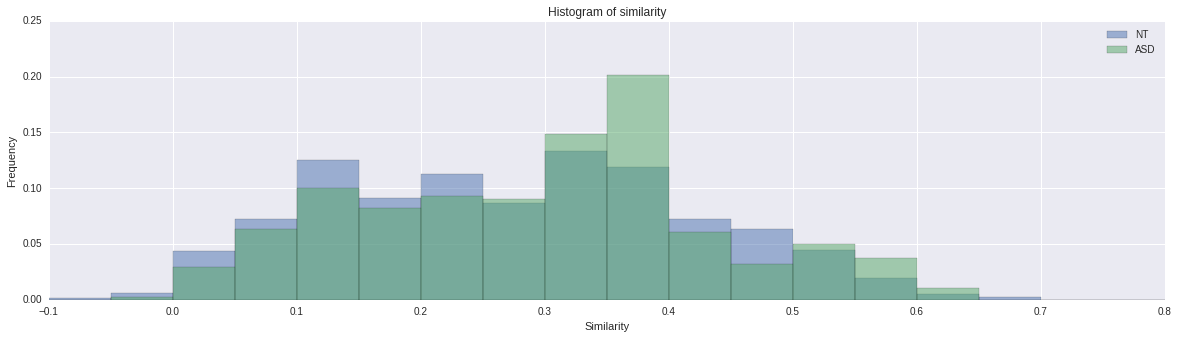

In [187]:
nt = tdf[tdf['nt']].sim
asd = tdf[tdf['nt']==False].sim

print("Number of NT word pairs: " + str(len(nt)))
print("\tMean similarity: " + str(nt.mean()))
print("Number of ASD word pairs: " + str(len(asd)))
print("\tMean similarity: " + str(asd.mean()))

#plot
w1 = np.ones_like(nt)/len(nt)
w2 = np.ones_like(asd)/len(asd)
bins = np.arange(-2,2,0.05)

plt.figure(figsize=(20, 5))
plt.hist(nt, bins=bins, alpha=0.5, label="NT", weights=w1)
plt.hist(asd, bins=bins, alpha=0.5, label="ASD", weights=w2)
plt.title('Histogram of similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-0.1,0.8])
plt.show()

1000 assocations! Still differences! I think that is good? or overfitting...? 

What to do?? 


Number of A word pairs: 1167
	Mean similarity: 0.275190000997
Number of B word pairs: 366
	Mean similarity: 0.296289939793


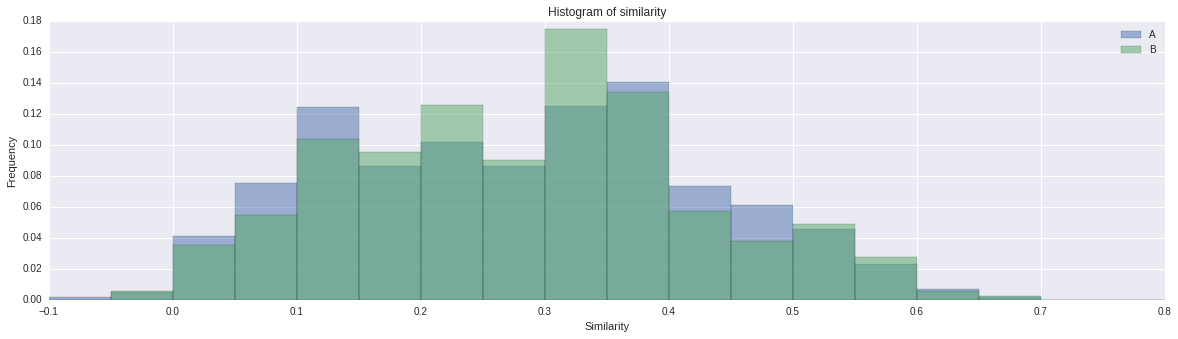

In [188]:
a = tdf[tdf['author']%5!=0].sim
b = tdf[tdf['author']%5==0].sim

print("Number of A word pairs: " + str(len(a)))
print("\tMean similarity: " + str(nt.mean()))
print("Number of B word pairs: " + str(len(b)))
print("\tMean similarity: " + str(asd.mean()))

#plot
w1 = np.ones_like(a)/len(a)
w2 = np.ones_like(b)/len(b)
bins = np.arange(-2,2,0.05)

plt.figure(figsize=(20, 5))
plt.hist(a, bins=bins, alpha=0.5, label="A", weights=w1)
plt.hist(b, bins=bins, alpha=0.5, label="B", weights=w2)
plt.title('Histogram of similarity')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([-0.1,0.8])
plt.show()

Shit shit shit... :( 